# Project 1

### The goal of the analysis
Using regression tools to analyze COVID 19 data

### The measurement is covid 19 cases  and the two factors are poverty and age. 

-> It is essential to recognize and address one of the often overlooked but critical factors influencing the spread and impact of the virus - poverty. Poverty and COVID-19 are interconnected in ways that demand our attention and action

-> Age is a well-established risk factor for COVID-19 severity. Older individuals, especially those over 65, are more likely to experience severe outcomes, including hospitalization and death. By analyzing the median age of a population, we can assess the potential vulnerability of a region to COVID-19.

-> Understanding the impact of age and poverty on COVID-19 can aid public health authorities in planning interventions and allocating resources. Areas with older populations or poor may require additional healthcare resources or targeted public health campaigns.

In [51]:
import pandas as pd

xlsx_file_path = "Math_Data.xlsx"
df = pd.read_excel(xlsx_file_path)

print(df.to_string(index=False))


                     NAME  AGE  POVERTY  CASES  DEATHS
         Adams County, PA 44.0      8.6   4649      90
     Allegheny County, PA 40.7     11.3  54362    1036
     Armstrong County, PA 47.0     11.8   3507      70
        Beaver County, PA 44.9     11.1   8504     256
       Bedford County, PA 47.2     11.6   2969      97
         Berks County, PA 40.0     12.9  23758     571
         Blair County, PA 43.4     11.9   7956     176
      Bradford County, PA 44.0     13.7   3088      56
         Bucks County, PA 44.0      6.5  30891     908
        Butler County, PA 43.3      8.5   9442     201
       Cambria County, PA 45.5     12.9   8910     254
       Cameron County, PA 51.8     13.4    157       4
        Carbon County, PA 46.2     14.0   2834      90
        Centre County, PA 33.5     15.2   9031     142
       Chester County, PA 40.6      6.6  20648     520
       Clarion County, PA 41.6     11.8   2036      46
    Clearfield County, PA 45.2     14.2   4138      50
       Cli

In [52]:
import pandas as pd

# Calculate the correlation between 'AGE' and 'DEATHS'
age_death_correlation = df['AGE'].corr(df['DEATHS'])

# Calculate the correlation between 'POVERTY' and 'DEATHS'
poverty_death_correlation = df['POVERTY'].corr(df['DEATHS'])

print(f"Correlation between 'AGE' and 'DEATHS': {age_death_correlation}")
print(f"Correlation between 'POVERTY' and 'DEATHS': {poverty_death_correlation}")


Correlation between 'AGE' and 'DEATHS': -0.4948678618918243
Correlation between 'POVERTY' and 'DEATHS': 0.060649291131292256


The correlation between 'AGE' and 'DEATHS' is approximately -0.495. This negative correlation suggests that as the average age in a specific location increases, the number of deaths tends to decrease, but the relationship is not very strong.

The correlation between 'POVERTY' and 'DEATHS' is approximately 0.061. This positive correlation suggests a weak positive relationship between the poverty rate and the number of deaths. In this case, as the poverty rate increases, the number of deaths may slightly increase, but the correlation is weak.

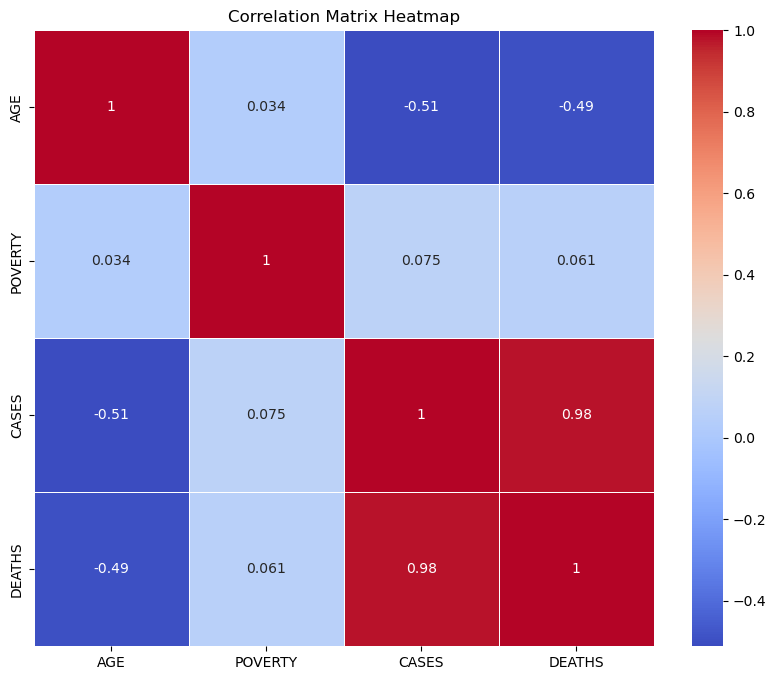

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))  # Set the figure size

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')

plt.show()


The resulting heatmap visualizes the correlations between numeric columns in your DataFrame, making it easier to identify patterns and relationships in your data. Positive correlations will appear in warmer colors, negative correlations in cooler colors, and weaker correlations closer to white.

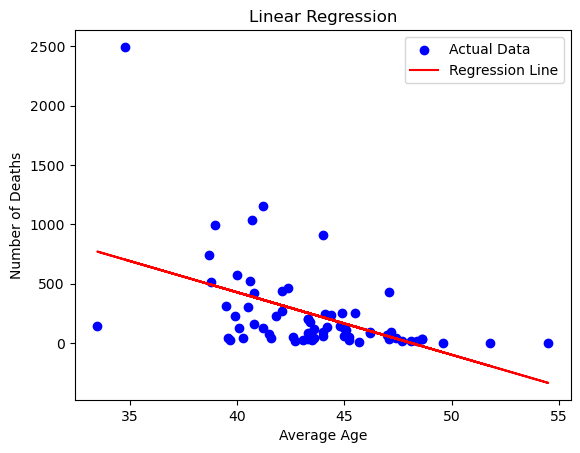

In [54]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

model = LinearRegression()

X = df[['AGE']] 
y = df['DEATHS']

# Fit the linear regression model to data
model.fit(X, y)

# Making predictions
y_pred = model.predict(X)

# Plot the data and the regression line
plt.scatter(X, y, label='Actual Data', color='b')
plt.plot(X, y_pred, label='Regression Line', color='r')
plt.xlabel('Average Age')
plt.ylabel('Number of Deaths')
plt.title('Linear Regression')
plt.legend()
plt.show()


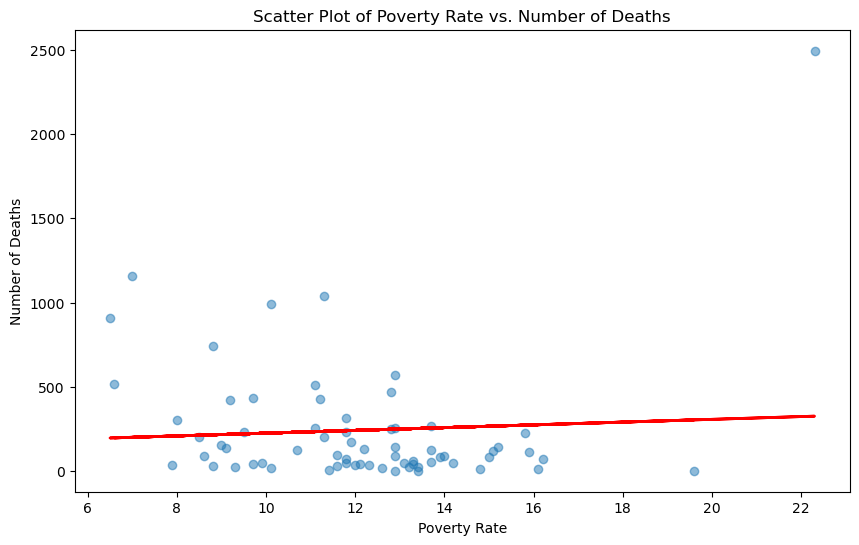

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(10, 6))
plt.scatter(df['POVERTY'], df['DEATHS'], alpha=0.5)
plt.xlabel('Poverty Rate')
plt.ylabel('Number of Deaths')
plt.title('Scatter Plot of Poverty Rate vs. Number of Deaths')

model = LinearRegression()
X = df[['POVERTY']]
y = df['DEATHS']
model.fit(X, y)

# Generating predictions from the model
y_pred = model.predict(X)

# Plot the regression line
plt.plot(X, y_pred, color='red', linewidth=2)

plt.show()


In [56]:
import pandas as pd
from scipy import stats
import numpy as np

# Separating the data into two groups based on 'POVERTY'
below_threshold = df[df['POVERTY'] < 10]['AGE']
above_threshold = df[df['POVERTY'] >= 10]['AGE']

# Perform t-tests
t_statistic, p_value = stats.ttest_ind(below_threshold, above_threshold)

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")


T-Statistic: -1.596823102210191
P-Value: 0.1151558431157544


The t-statistic measures the difference in means between the two groups (below the poverty threshold and above the poverty threshold). In this case, the negative t-statistic suggests that the average 'AGE' in the group with poverty rates below the threshold is slightly lower than in the group with poverty rates above the threshold, but the difference is not very large.

The p-value is 0.115, which is relatively higher than the typical significance level of 0.05. A higher p-value suggests that there is not enough evidence to reject the null hypothesis. In practical terms, it means that the difference in average 'AGE' between the two groups is not statistically significant at the 0.05 significance level.


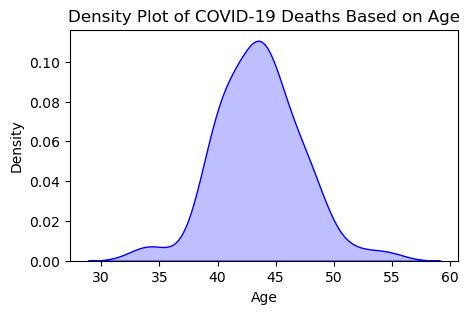

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))

# density plot for COVID-19 deaths based on age
sns.kdeplot(data=df, x='AGE', fill=True, common_norm=False, color='blue')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density Plot of COVID-19 Deaths Based on Age')

plt.show()


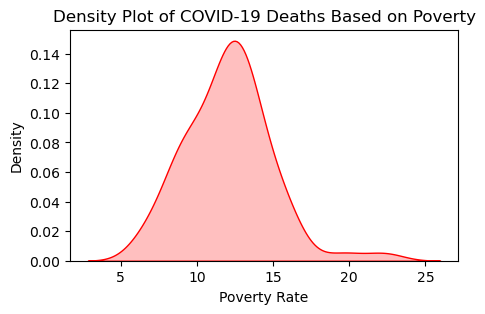

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))

#density plot for COVID-19 deaths based on poverty
sns.kdeplot(data=df, x='POVERTY', fill=True, common_norm=False, color='red')
plt.xlabel('Poverty Rate')
plt.ylabel('Density')
plt.title('Density Plot of COVID-19 Deaths Based on Poverty')

plt.show()


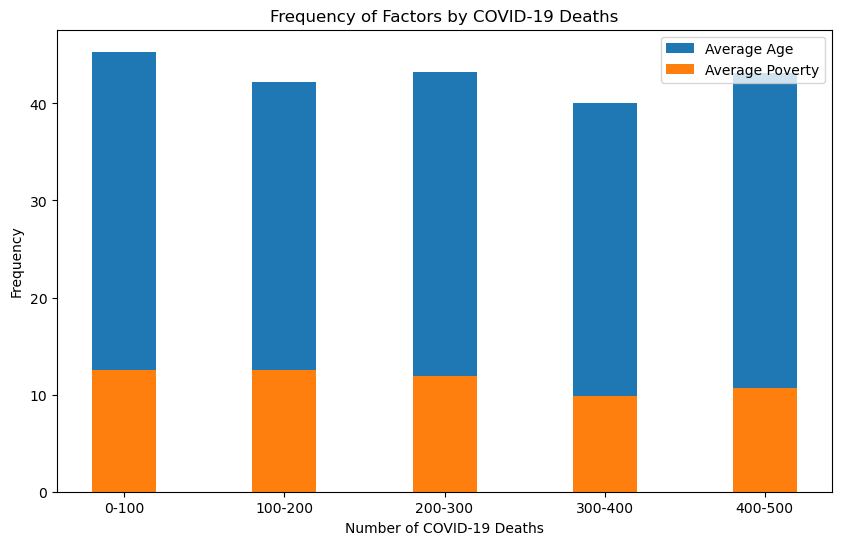

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

death_ranges = [0, 100, 200, 300, 400, 500] 
age_frequency = {}
poverty_frequency = {}

# Iterate through the death ranges
for i in range(len(death_ranges) - 1):
    lower_limit = death_ranges[i]
    upper_limit = death_ranges[i + 1]
    # Filter data within the current death range
    filtered_data = df[(df['DEATHS'] >= lower_limit) & (df['DEATHS'] < upper_limit)]
    # Calculate the frequency of 'AGE' and 'POVERTY' within this death range
    age_frequency[i] = filtered_data['AGE'].mean()
    poverty_frequency[i] = filtered_data['POVERTY'].mean()

plt.figure(figsize=(10, 6))
plt.bar(age_frequency.keys(), age_frequency.values(), width=0.4, label='Average Age')
plt.bar(poverty_frequency.keys(), poverty_frequency.values(), width=0.4, label='Average Poverty')
plt.xlabel('Number of COVID-19 Deaths')
plt.ylabel('Frequency')
plt.xticks(list(age_frequency.keys()), [f'{death_ranges[i]}-{death_ranges[i+1]}' for i in range(len(death_ranges) - 1)])
plt.title('Frequency of Factors by COVID-19 Deaths')
plt.legend()
plt.show()


In [60]:
import pandas as pd
import statsmodels.api as sm

df['AGE_POVERTY_INTERACTION'] = df['AGE'] * df['POVERTY']
X = df[['AGE', 'POVERTY', 'AGE_POVERTY_INTERACTION']]
X = sm.add_constant(X) 
y = df['DEATHS']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 DEATHS   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     12.05
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           2.47e-06
Time:                        04:15:18   Log-Likelihood:                -477.78
No. Observations:                  67   AIC:                             963.6
Df Residuals:                      63   BIC:                             972.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -3